# EDA (Exploratory Data Analysis)
Notebook created to load the data, look into into it and get some understanding of what is happening inside.

## Load packages and  dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix 

In [2]:
df = pd.read_csv('data/Bank Customer Churn Prediction.csv')

## Look into the data

Look into  the data itself a bit:

In [3]:
df.shape

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


What is the distribution of classes:

In [6]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

How null values look like:

In [7]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

## EDA

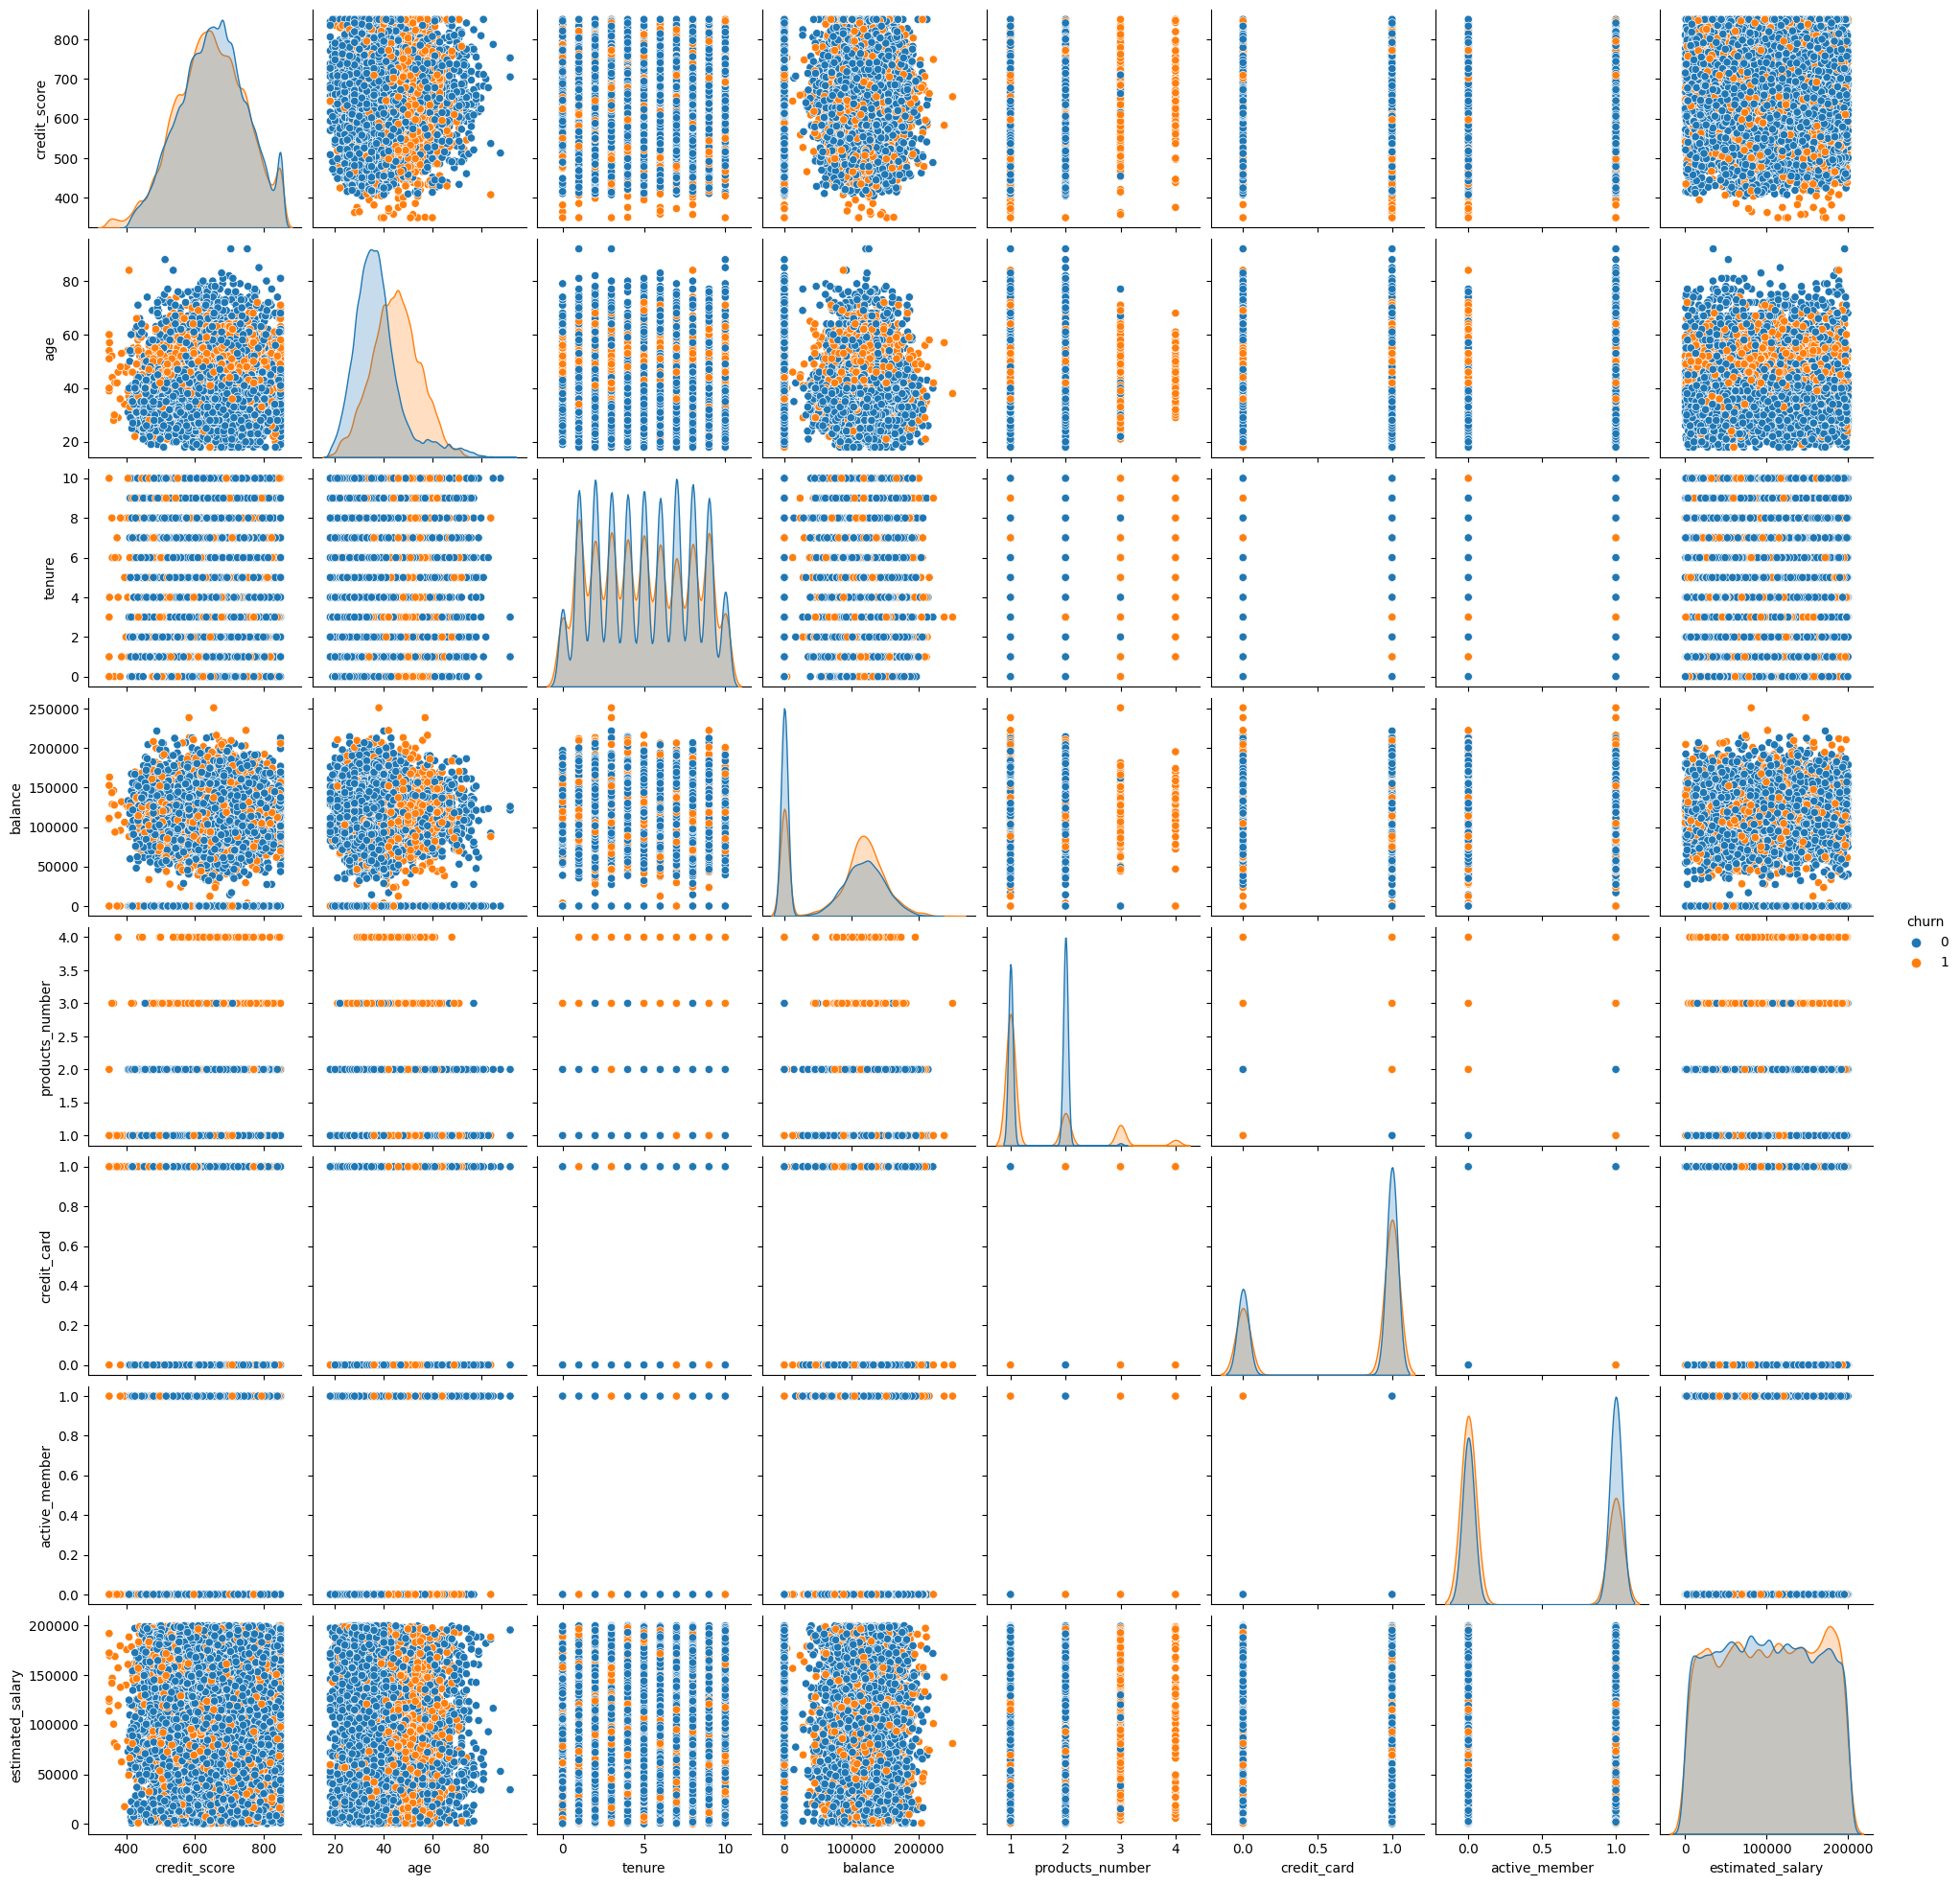

In [18]:
# plotting without cutomer_id
sns.pairplot(df.iloc[:,1:], hue='churn', 
             diag_kws={'bw_adjust': 0.5, 'common_norm': False} 
             # normalizing distributions
             # common_norm set to False ensures that each histogram is scaled independently to have unit area
            ) 
plt.show() 

First observations after looking at summary of plots:
- age distribution is left skewed for not churn vs no skewed for churn
- 1, 3, 4 number of products are more likely to churn
- strange observation that active_memebr can be churn (we will get rid of active memeber - it can be mistake in the data/ other approach could be getting rid of active memebr + observations with churn and active member)

## Closer look into the data

### credit_score

<AxesSubplot: >

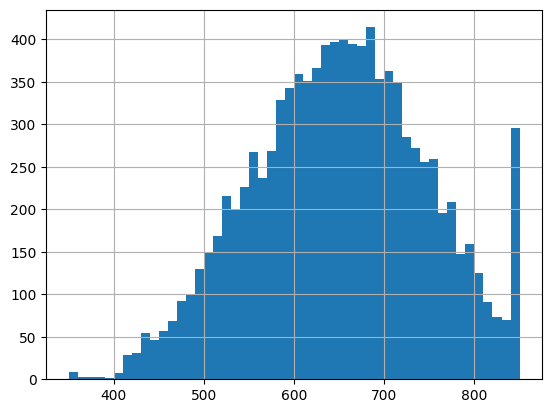

In [8]:
df['credit_score'].hist(bins=50)

<AxesSubplot: >

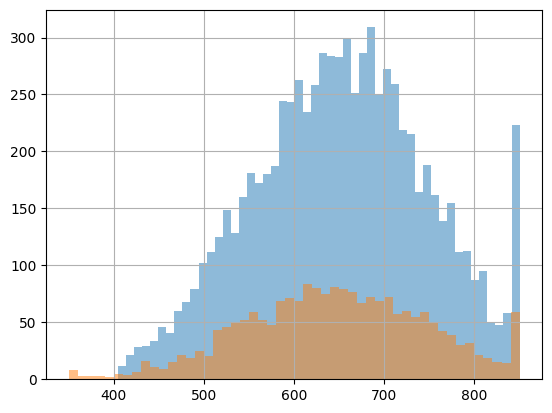

In [9]:
ax = df[df['churn']==0]['credit_score'].hist(bins=50, alpha=0.5)
df[df['churn']==1]['credit_score'].hist(bins=50, ax=ax, alpha=0.5)

### country

In [17]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

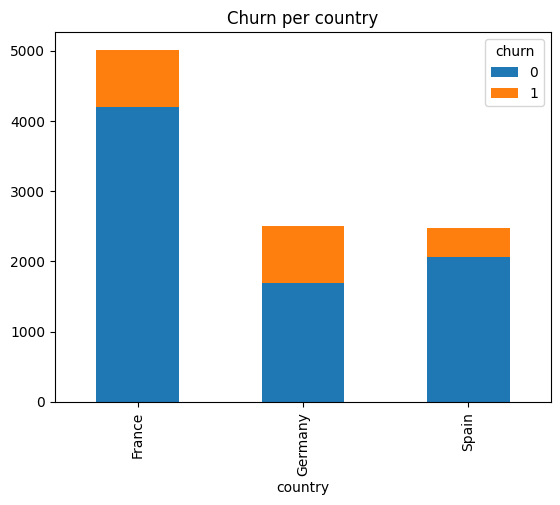

In [20]:
# let's groupby and plot
d = df.groupby(['country','churn'])['customer_id'].count().unstack()
d.plot(kind='bar',stacked=True, title = "Churn per country")
plt.show()

### gender

In [21]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

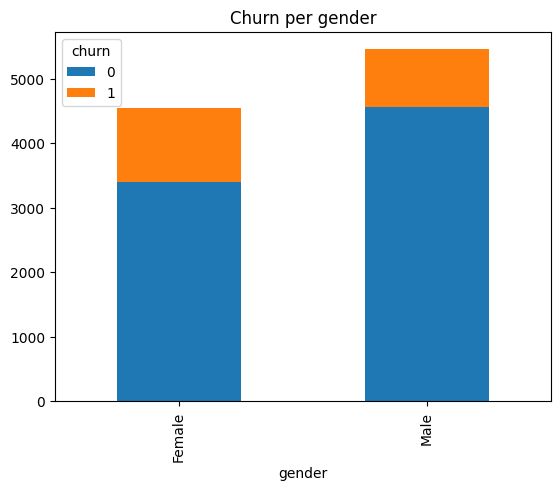

In [22]:
# let's groupby and plot
d = df.groupby(['gender','churn'])['customer_id'].count().unstack()
d.plot(kind='bar',stacked=True, title = "Churn per gender")
plt.show()

### age

<AxesSubplot: >

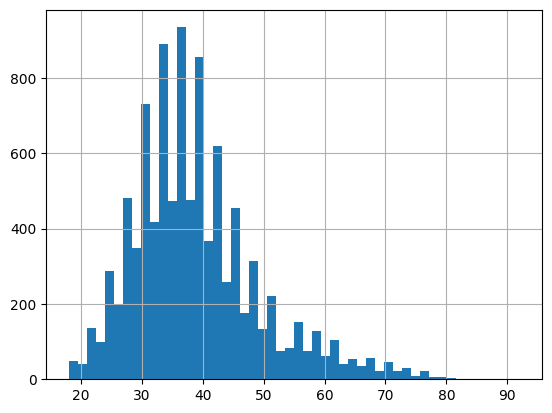

In [23]:
df['age'].hist(bins=50)

<AxesSubplot: >

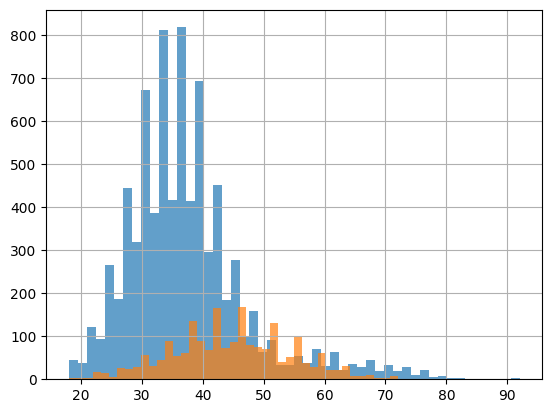

In [25]:
ax = df[df['churn']==0]['age'].hist(bins=50, alpha=0.7)
df[df['churn']==1]['age'].hist(bins=50, ax=ax, alpha=0.7)

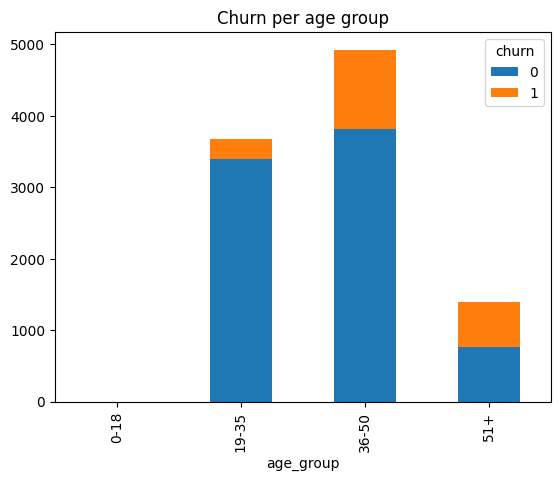

In [36]:
# add some bins to make it easier to follow

bins = [0, 18, 35, 50, 100]  # Bin edges
labels = ['0-18', '19-35', '36-50', '51+']  # Labels for the bins

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# let's groupby and plot
d = df.groupby(['age_group','churn'])['country'].count().unstack()
d.plot(kind='bar',stacked=True, title = "Churn per age group")
plt.show()

In [37]:
# convert it to percentage per each class

d['total'] = d[[0,1]].sum(1)
d['0_p'] = d[0]/d['total']
d['1_p'] = d[1]/d['total']

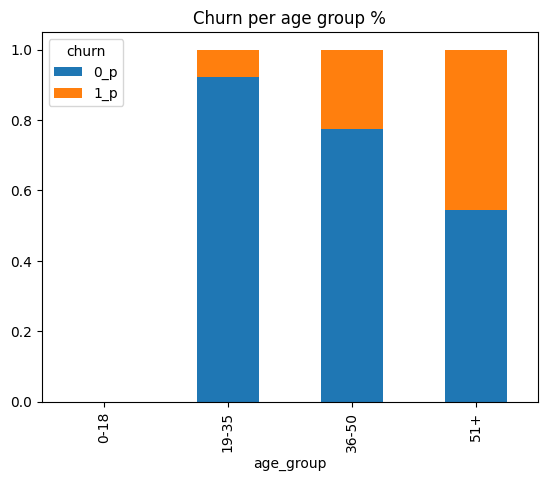

In [38]:
d[['0_p', '1_p']].plot(kind='bar',stacked=True, title = "Churn per age group %")
plt.show()

### tenure

<AxesSubplot: >

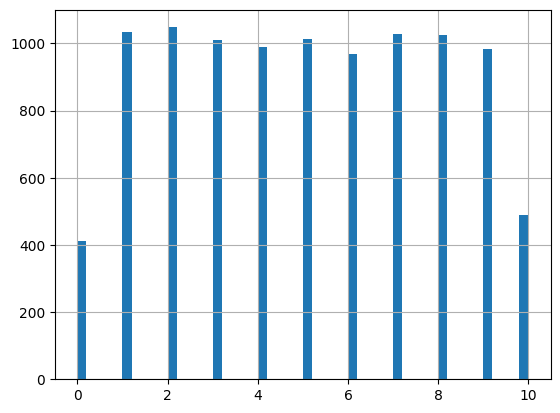

In [14]:
df['tenure'].hist(bins=50)

### balance

<AxesSubplot: >

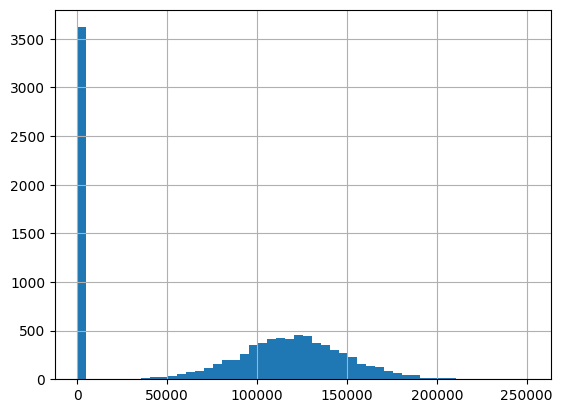

In [15]:
df['balance'].hist(bins=50)

<AxesSubplot: >

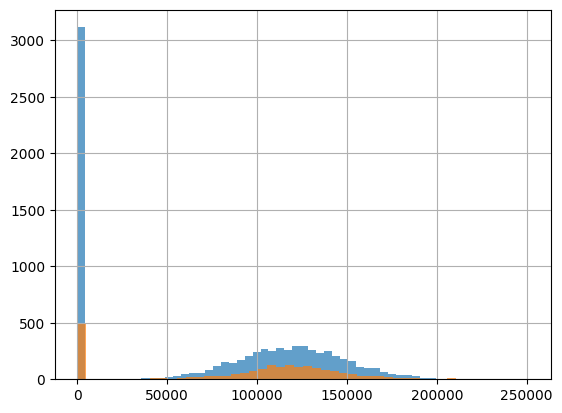

In [27]:
ax = df[df['churn']==0]['balance'].hist(bins=50, alpha=0.7)
df[df['churn']==1]['balance'].hist(bins=50, ax=ax, alpha=0.7)

### products_number

In [16]:
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

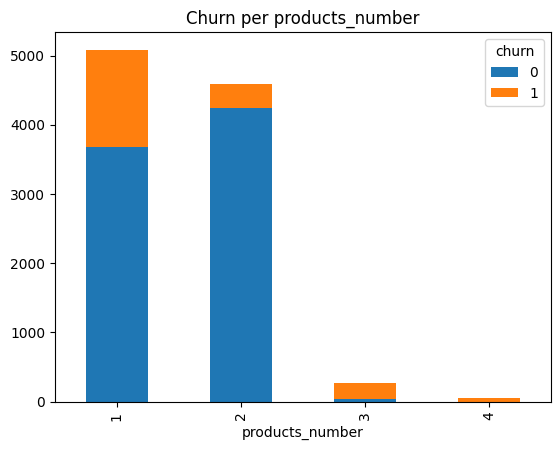

In [39]:
# let's groupby and plot
d = df.groupby(['products_number','churn'])['country'].count().unstack()
d.plot(kind='bar',stacked=True, title = "Churn per products_number")
plt.show()

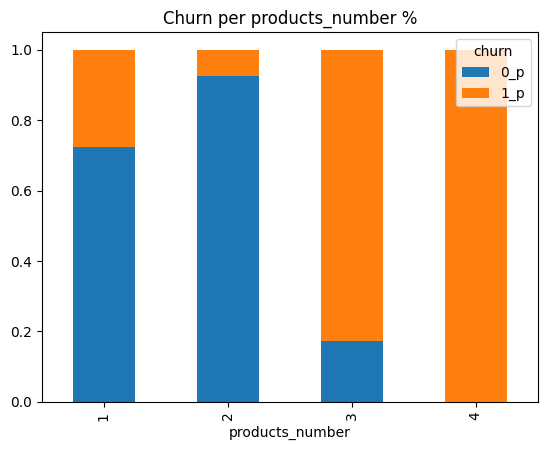

In [40]:
d['total'] = d[[0,1]].sum(1)
d['0_p'] = d[0]/d['total']
d['1_p'] = d[1]/d['total']

d[['0_p', '1_p']].plot(kind='bar',stacked=True, title = "Churn per products_number %")
plt.show()

### credit_card

In [17]:
df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

### active_member

In [18]:
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

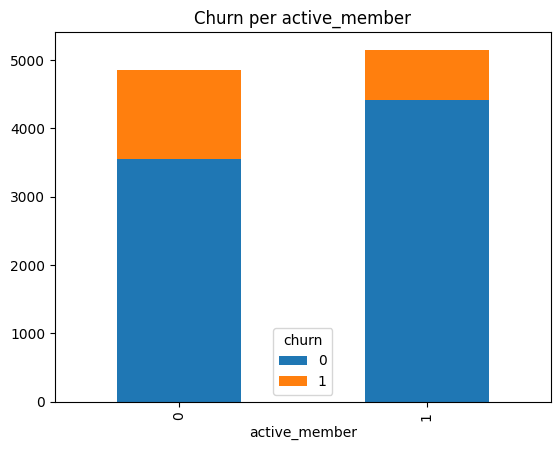

In [29]:
# let's groupby and plot
d = df.groupby(['active_member','churn'])['country'].count().unstack()
d.plot(kind='bar',stacked=True, title = "Churn per active_member")
plt.show()

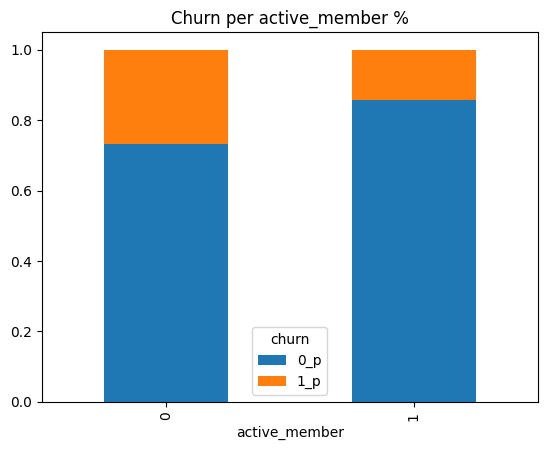

In [30]:
# convert it to percentage per each class

d['total'] = d[[0,1]].sum(1)
d['0_p'] = d[0]/d['total']
d['1_p'] = d[1]/d['total']

d[['0_p', '1_p']].plot(kind='bar',stacked=True, title = "Churn per active_member %")
plt.show()

### estimated_salary

<AxesSubplot: >

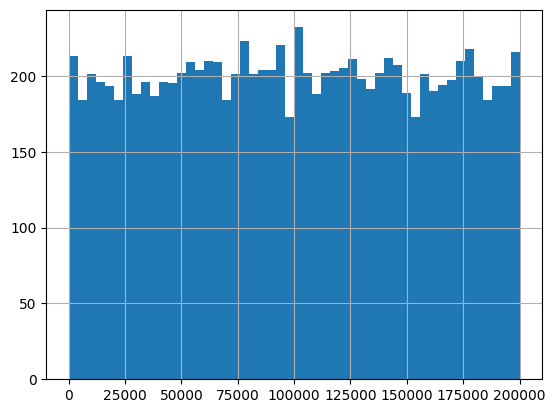

In [21]:
df['estimated_salary'].hist(bins=50)

<AxesSubplot: >

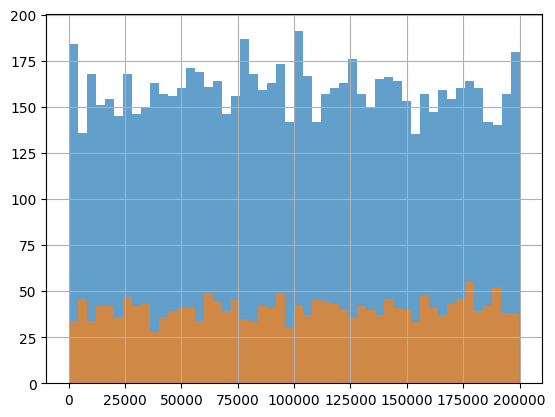

In [28]:
ax = df[df['churn']==0]['estimated_salary'].hist(bins=50, alpha=0.7)
df[df['churn']==1]['estimated_salary'].hist(bins=50, ax=ax, alpha=0.7)